# Proyecto: Aplicación de la descomposición de valores singulares para la compresión de imágenes

In [9]:
%matplotlib inline

import numpy as np 

import matplotlib.pyplot as plt 

from PIL import Image

In [12]:
plt.style.use('classic')

# cargamos archivo de imagen:
imagen = Image.open('./Imagenes/imagen_ejemplo_frida_bredesen.jpg')
type(imagen)

PIL.JpegImagePlugin.JpegImageFile

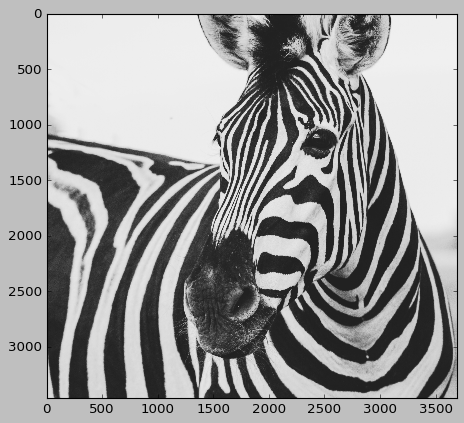

In [13]:
# Graficamos:
plt.imshow(imagen)
plt.show()

In [15]:
# pasamos la imagen a escala de grises:
imagen_gr = imagen.convert('LA')
type(imagen_gr)

PIL.Image.Image

In [18]:
# transformamos la imagen en una matriz:

# Primero la pasamos en un vector:
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)

# Ahora le damos la forma de matriz:
n_ren = imagen_gr.size[1]
n_col = imagen_gr.size[0]
imagen_mat.shape = (n_ren,n_col) 

print( imagen_mat.shape )

(3456, 3693)


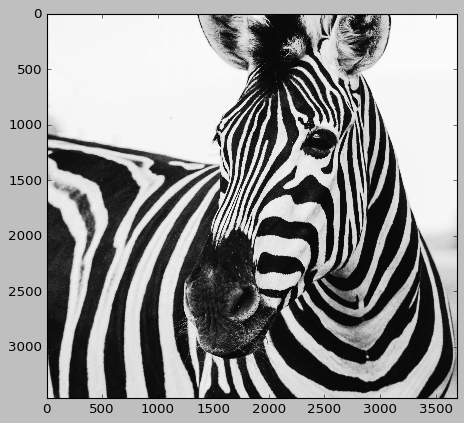

In [19]:
# Graficamos la matriz:
plt.imshow(imagen_mat , cmap='gray')
plt.show()

In [20]:
# Normalizamos los valores de la matriz:
imagen_mat2 = imagen_mat/np.max(imagen_mat)

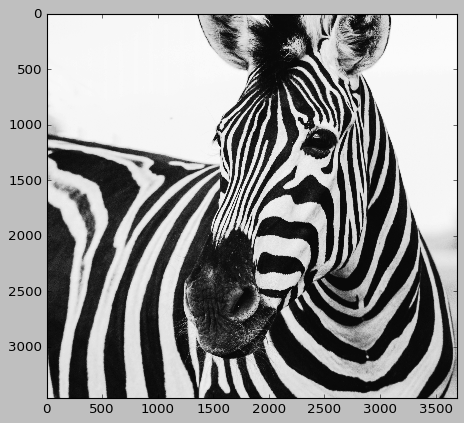

In [21]:
# Graficamos la matriz normalizada:
plt.imshow(imagen_mat2, cmap='gray')
plt.show()

# vemos que no hay cambio en la estructura de la imágen:

## Aplicando descomposición SVD a la matriz de la imagen:

In [22]:
U,D,V = np.linalg.svd(imagen_mat2)
# Cada matriz represnta una serie de transformaciones que definene la matriz original:
# U <-- Primer rotación de la base
# D <-- Escalamiento (Valores singulaes)
# V <-- Segunda rotación de la base

In [23]:
print('Tamaño de la matriz completa = ', imagen_mat2.shape)
print('Tamaño de la matriz U = ', U.shape)
print('Tamaño de la matriz D = ', D.shape)
print('Tamaño de la matriz V = ', V.shape)

Tamaño de la matriz completa =  (3456, 3693)
Tamaño de la matriz U =  (3456, 3456)
Tamaño de la matriz D =  (3456,)
Tamaño de la matriz V =  (3693, 3693)


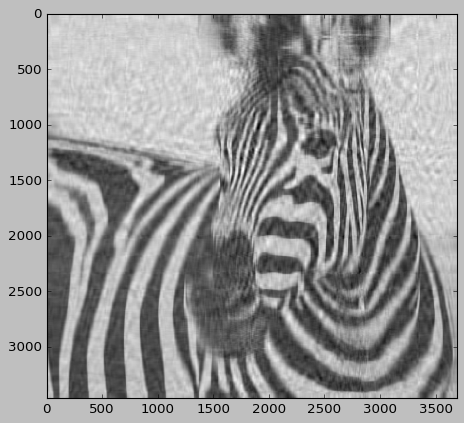

In [24]:
# Reconstrucción de la imágen a partir de los valores singulares:
k = 30 # < 3456 

Uk = U[:,0:k] # <-- extraemos primeras 'k' columnas
Dk = np.diag(D[0:k]) # <-- extraemos primeros 'k' valores singulares y hacemos la matriz diagonal
Vk = V[0:k,:] # <-- extraemos primeros 'k' renglones

# Reconstrucción: A = U*D*V
imagen_recons = np.dot( Uk, np.dot(Dk,Vk))

plt.imshow(imagen_recons, cmap='gray')
plt.show()

In [26]:
print('Peso en la imagen real: ',imagen_mat2.size)
print('Peso en la imagen comprimida: ', Uk.size + Dk[0:k].size + Vk.size )

Peso en la imagen real:  12763008
Peso en la imagen comprimida:  215370
